# 10_Simple-MLP-unsupervised-SBATCH.ipynb

Run several experiments and plot results

- Full MNIST dataset
- Number of epochs
- Tanh vs linear/margins embedding contrastive loss

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.simple_mlp_unsupervised_train_results import MLPTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [3]:
batch_size = 32
subset_fraction = 0.05
validation_ratio = 6
seed = 42
selected_labels = [4, 9]

train_pair_dataloader, val_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=True, subset_fraction=subset_fraction, validation_ratio=validation_ratio, seed=seed, 
    selected_labels=selected_labels
)
test_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=False, subset_fraction=subset_fraction, 
    selected_labels=selected_labels
)

device: cpu
num_workers: 1
device: cpu
num_workers: 1


## Quick test

```
sbatch sbatch_scripts/10_no-prune_linear_fast.sh
```

In [6]:
no_prune_linear_fast_result = MLPTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/no_prune_linear_fast/sbatch-54780166_bs-32_sf-0.05_sl-49_vr-6_id-0.5_nti-100_lmd-2_pat-linear_m-5.0_ugpp-False_lr-0.001_s-4")


In [8]:
no_prune_linear_fast_result.params['ugpp']

'False'

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Training and validation epoch/batch', ylabel='loss'>)

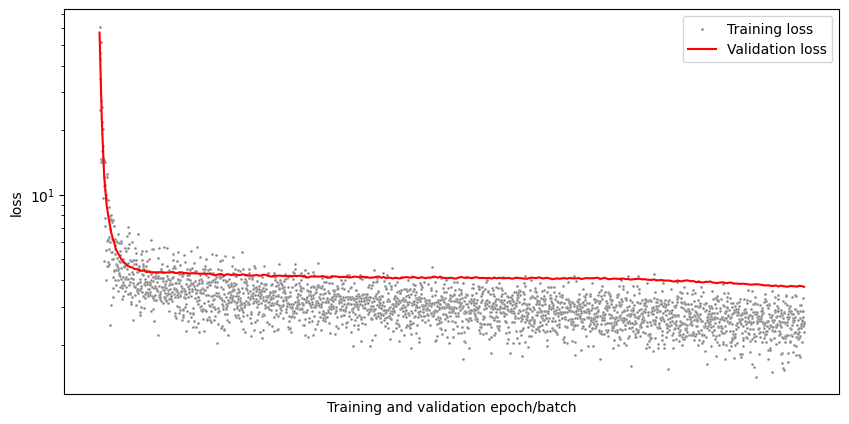

In [9]:
no_prune_linear_fast_result.plot_training_losses()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Grow/prune'>, <Axes: ylabel='Total model size'>,
        <Axes: xlabel='epoch', ylabel='test_err'>], dtype=object))

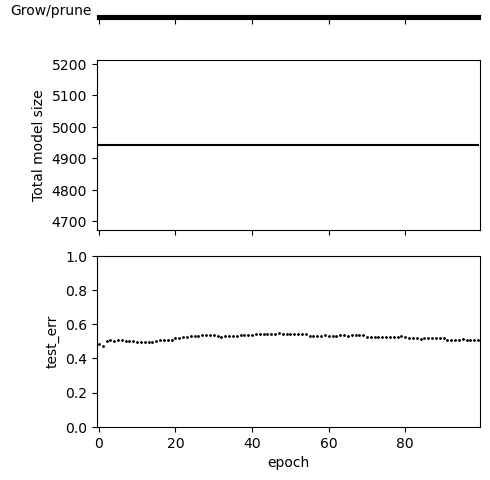

In [10]:
no_prune_linear_fast_result.plot_pruning()

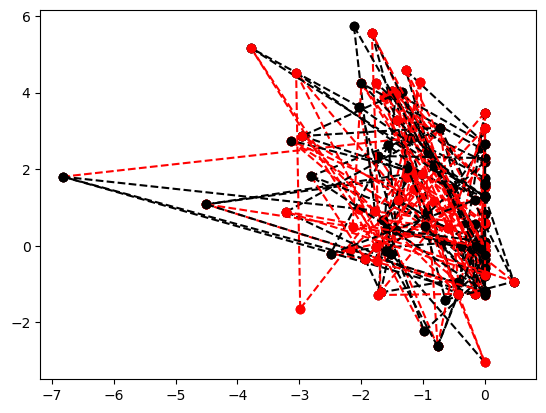

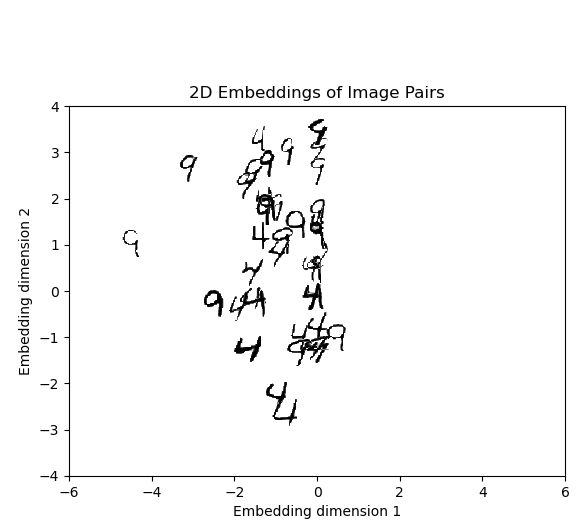

In [12]:
no_prune_linear_fast_result.set_trained_model(99)
no_prune_linear_fast_result.plot_pairs(test_pair_dataloader)
plt.show()
no_prune_linear_fast_result.plot_image_embeddings(test_pair_dataloader)
plt.show()